In [3]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *
import numpy as np
import sys

sys.path.append("/home/isidro/Documents/github/simplemc_tests/")
from simplemc.plots.Plot_elipses import plot_elipses

%matplotlib inline

Initalizing nu density look up table... Done


In [4]:
dir_name = "/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/"

root_lcdm_nested = "LCDM_phy_Pantheon+HD+DR16BAO_nested_multi"
cov_lcdm_gadeap = np.loadtxt(dir_name+"LCDM_phy_Pantheon+HD+DR16BAO_ga_deap.cov", delimiter=',')
cov_lcdm_maxlike = np.loadtxt(dir_name+"LCDM_phy_Pantheon+HD+DR16BAO_maxlike_optimization.cov", delimiter=',')

root_cpl_nested = "waCDM_phy_Pantheon+HD+DR16BAO_nested_multi"
cov_cpl_gadeap = np.loadtxt(dir_name+"waCDM_phy_Pantheon+HD+DR16BAO_ga_deap.cov", delimiter=',')
cov_cpl_maxlike = np.loadtxt(dir_name+"waCDM_phy_Pantheon+HD+DR16BAO_maxlike_optimization.cov", delimiter=',')

root_polycdm_nested = "PolyCDM_phy_Pantheon+HD+DR16BAO_nested_multi"
cov_polycdm_gadeap = np.loadtxt(dir_name+"PolyCDM_phy_Pantheon+HD+DR16BAO_ga_deap.cov", delimiter=',')
cov_polycdm_maxlike = np.loadtxt(dir_name+"PolyCDM_phy_Pantheon+HD+DR16BAO_maxlike_optimization.cov", delimiter=',')

root_graduated_nested = "Grad_Ok_phy_Pantheon+HD+DR16BAO_nested_multi"
cov_graduated_gadeap = np.loadtxt(dir_name+"Grad_Ok_phy_Pantheon+HD+DR16BAO_ga_deap.cov", delimiter=',')
cov_graduated_maxlike = np.loadtxt(dir_name+"Grad_Ok_phy_Pantheon+HD+DR16BAO_maxlike_optimization.cov", delimiter=',')

root_graduatedBAO_nested = "Grad_Ok_phy_BBAO_nested_multi"
cov_graduatedBAO_gadeap = np.loadtxt(dir_name+"Grad_Ok_phy_BBAO_ga_deap.cov", delimiter=',')
cov_graduatedBAO_maxlike = np.loadtxt(dir_name+"Grad_Ok_phy_BBAO_maxlike_optimization.cov", delimiter=',')

## LCDM

-- vals, vecs --  [0.0002918  0.00017325] [[-0.17229628 -0.98504517]
 [ 0.98504517 -0.17229628]]
-- vals, vecs --  [0.00029279 0.00017218] [[-0.16910754 -0.98559761]
 [ 0.98559761 -0.16910754]]


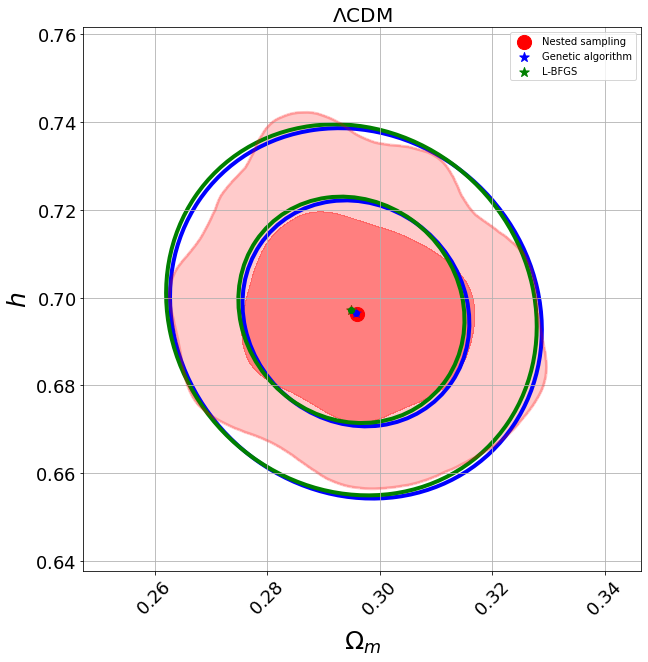

<Figure size 720x576 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2958, 0.0220, 0.6964], cov_lcdm_gadeap, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2950, 0.0220, 0.6972], cov_lcdm_maxlike, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.2960, 0.6963, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.2958, 0.6964, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.2950, 0.6972, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_lcdm_nested, 'Om', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_title('$\Lambda$CDM', fontsize=20)
fig.savefig('lcdm_genetic.png')

### LCDM stats 

In [11]:
mc_samp = mcsamples.loadMCSamples(dir_name +'/'+ root_lcdm_nested, settings={'ignore_rows':0.0})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
summary = mcstats.likeSummary()
print(summary)
print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))

Best fit sample -log(Like) = 524.622227
mean(-Ln(like)) = 526.039886
-Ln(mean like)  = 525.602343

-2loglike: 1049.2445


## CPL

-- vals, vecs --  [0.00087058 0.0002743 ] [[ 0.58269931 -0.81268783]
 [ 0.81268783  0.58269931]]
-- vals, vecs --  [0.00088905 0.00027135] [[ 0.59432975 -0.80422145]
 [ 0.80422145  0.59432975]]


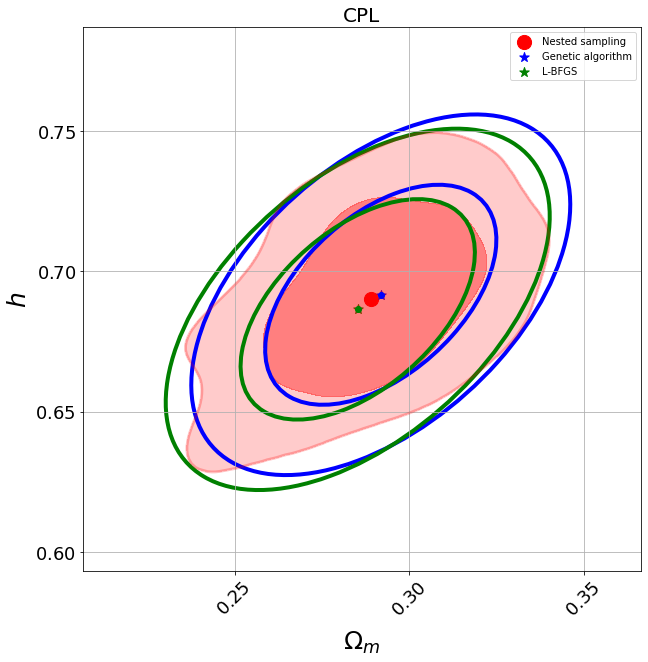

<Figure size 720x576 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2919, 0.0220, 0.6916, -0.9803, 0.0330], cov_cpl_gadeap, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2853, 0.0220, 0.6864, -1.0082, 0.2556], cov_cpl_maxlike, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.2892, 0.6901, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.2919, 0.6916, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.2853, 0.6864, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_cpl_nested, 'Om', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_title('CPL', fontsize=20)
fig.savefig('cpl_genetic.png')

-- vals, vecs --  [0.36918882 0.00336618] [[-0.11642706 -0.99319924]
 [ 0.99319924 -0.11642706]]
-- vals, vecs --  [0.27276002 0.00340628] [[-0.1164089  -0.99320137]
 [ 0.99320137 -0.1164089 ]]


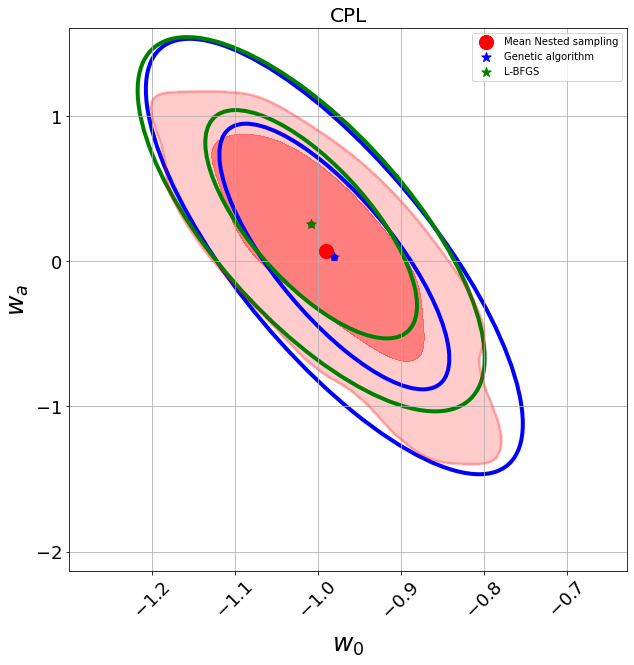

<Figure size 720x576 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2919, 0.0220, 0.6916, -0.9803, 0.0330], cov_cpl_gadeap, par1=3, par2=4, par1_Ltx='$w_0$', par2_Ltx='$w_a$', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2853, 0.0220, 0.6864, -1.0082, 0.2556], cov_cpl_maxlike, par1=3, par2=4, par1_Ltx='$w_0$', par2_Ltx='$w_a$', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(-0.9909, 0.0679, marker='o', s=200, c='red', label='Mean Nested sampling')
ax.scatter(-0.9803, 0.0330, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(-1.0082, 0.2556, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_cpl_nested, 'w', 'wa', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_title('CPL', fontsize=20)
fig.savefig('cpl2_genetic.png')

### CPL stats

In [12]:
mc_samp = mcsamples.loadMCSamples(dir_name +'/'+ root_cpl_nested, settings={'ignore_rows':0.0})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
summary = mcstats.likeSummary()
print(summary)
print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))

/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/waCDM_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt
Removed no burn in
Best fit sample -log(Like) = 524.470734
mean(-Ln(like)) = 526.927057
-Ln(mean like)  = 526.194959

-2loglike: 1048.9415


## PolyCDM

-- vals, vecs --  [0.00134947 0.00031725] [[-0.72787361  0.68571131]
 [-0.68571131 -0.72787361]]
-- vals, vecs --  [0.00132969 0.00031335] [[-0.72006111  0.69391066]
 [-0.69391066 -0.72006111]]


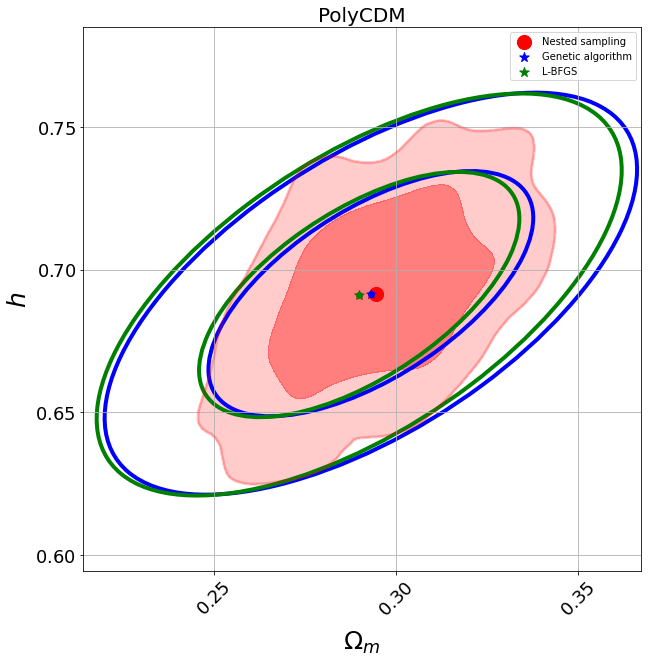

<Figure size 720x576 with 0 Axes>

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2931, 0.0220, 0.6916, 0.0947, -0.0147, 0.0076], cov_polycdm_gadeap, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2899, 0.0220,  0.6913, 0.0150, 0.0136, -0.0013], cov_polycdm_maxlike, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.2945, 0.6916, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.2931, 0.6916, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.2899, 0.6913, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_polycdm_nested, 'Om', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_title('PolyCDM', fontsize=20)
fig.savefig('polycdm_genetic.png')

-- vals, vecs --  [0.21843349 0.00429151] [[-0.91206959 -0.41003544]
 [ 0.41003544 -0.91206959]]
-- vals, vecs --  [0.21652713 0.00427587] [[-0.9124788  -0.40912399]
 [ 0.40912399 -0.9124788 ]]


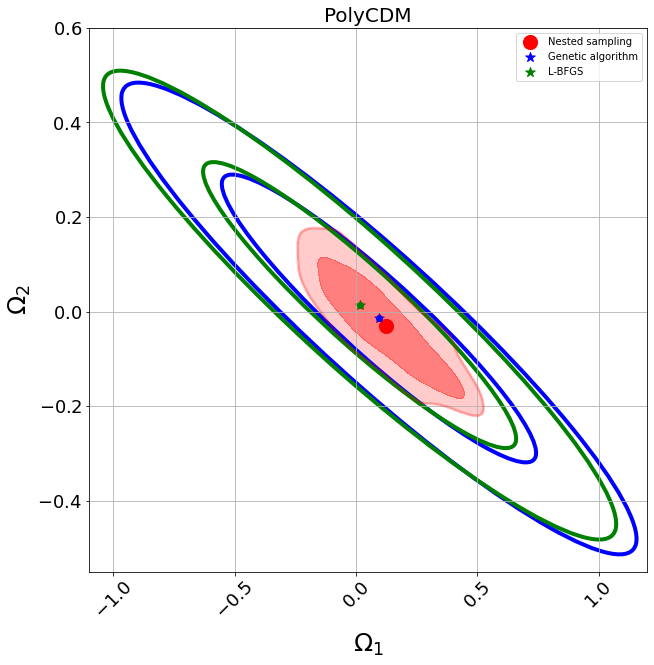

<Figure size 720x576 with 0 Axes>

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2931, 0.0220, 0.6916, 0.0947, -0.0147, 0.0076], cov_polycdm_gadeap, par1=3, par2=4, 
             par1_Ltx='$\Omega_1$', par2_Ltx='$\Omega_2$', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2899, 0.0220,  0.6913, 0.0150, 0.0136, -0.0013], cov_polycdm_maxlike, par1=3, par2=4,
             par1_Ltx='$\Omega_1$', par2_Ltx='$\Omega_2$', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.1232, -0.0298, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.0947, -0.0147, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.0150, 0.0136, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_polycdm_nested, 'Om1', 'Om2', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_ylim(-0.55, 0.6)
ax.set_xlim(-1.1, 1.2)
ax.set_title('PolyCDM', fontsize=20)
fig.savefig('polycdm2_genetic.png')

In [16]:
mc_samp = mcsamples.loadMCSamples(dir_name +'/'+ root_polycdm_nested, settings={'ignore_rows':0.0})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
summary = mcstats.likeSummary()
print(summary)
print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))

/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/PolyCDM_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt
Removed no burn in
Best fit sample -log(Like) = 524.564302
mean(-Ln(like)) = 526.517147
-Ln(mean like)  = 525.933787

-2loglike: 1049.1286


## Graduated 

-- vals, vecs --  [0.00081121 0.00028824] [[ 0.60159459 -0.79880157]
 [ 0.79880157  0.60159459]]
-- vals, vecs --  [0.00081159 0.00028723] [[ 0.60092111 -0.79930834]
 [ 0.79930834  0.60092111]]


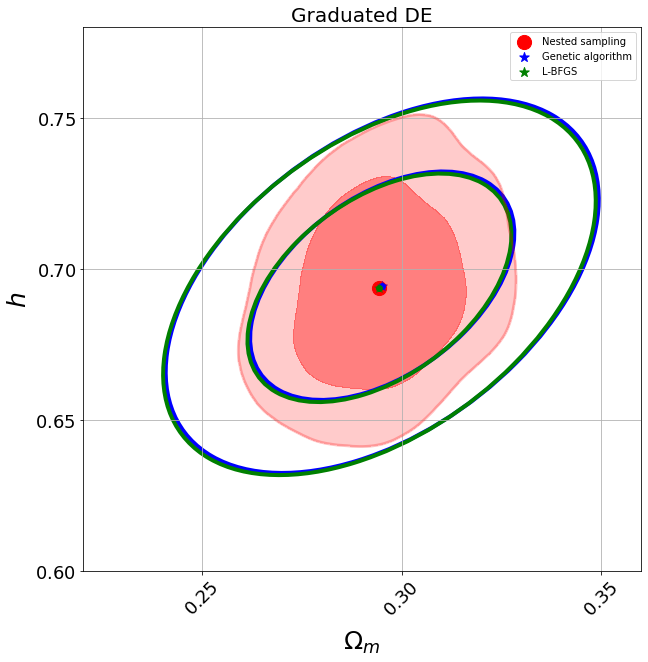

<Figure size 720x576 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2951, 0.0220, 0.6945, -0.9713, -0.0103], cov_graduated_gadeap, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2944, 0.0220,  0.6938, -0.9730, -0.0065], cov_graduated_maxlike, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.2942, 0.6938, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.2951, 0.6945, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.2944, 0.6938, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_graduated_nested, 'Om', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_ylim(0.6, 0.78)
ax.set_xlim(0.22, 0.36)
ax.set_title('Graduated DE', fontsize=20)
fig.savefig('graduated_genetic.png')

-- vals, vecs --  [0.01372232 0.00206818] [[-0.68019214 -0.73303387]
 [ 0.73303387 -0.68019214]]
-- vals, vecs --  [0.01380233 0.00207597] [[-0.68291333 -0.7304994 ]
 [ 0.7304994  -0.68291333]]


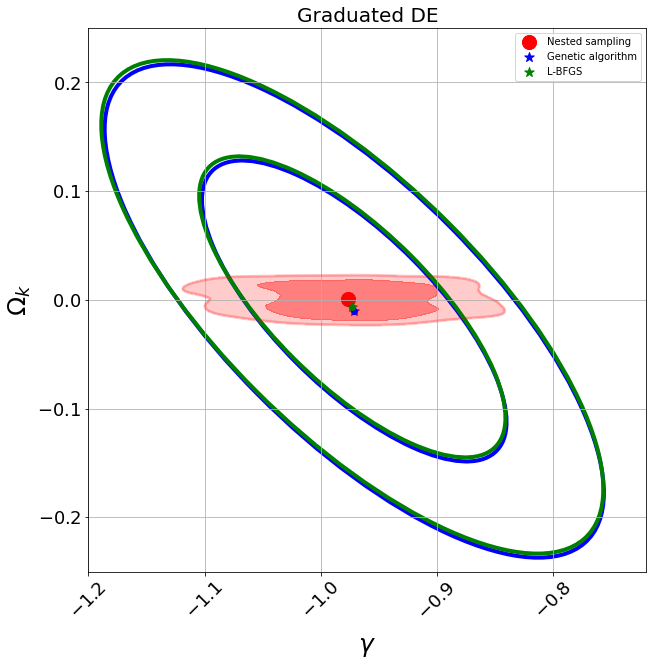

<Figure size 720x576 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2951, 0.0220, 0.6945, -0.9713, -0.0103], cov_graduated_gadeap, par1=3, par2=4, par1_Ltx='$\gamma$', par2_Ltx='$\Omega_k$', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2944, 0.0220,  0.6938, -0.9730, -0.0065], cov_graduated_maxlike, par1=3, par2=4, par1_Ltx='$\gamma$', par2_Ltx='$\Omega_k$', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(-0.9763, 0.0004, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(-0.9713, -0.0103, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(-0.9730, -0.0065, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_graduated_nested, 'ggama', 'Ok', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_ylim(-0.25, 0.25)
ax.set_xlim(-1.2, -0.72)
ax.set_title('Graduated DE', fontsize=20)
fig.savefig('graduated2_genetic.png')

-- vals, vecs --  [0.00746597 0.00061607] [[-0.99957171 -0.02926409]
 [ 0.02926409 -0.99957171]]
-- vals, vecs --  [0.00755046 0.00061658] [[-0.99959188 -0.02856711]
 [ 0.02856711 -0.99959188]]


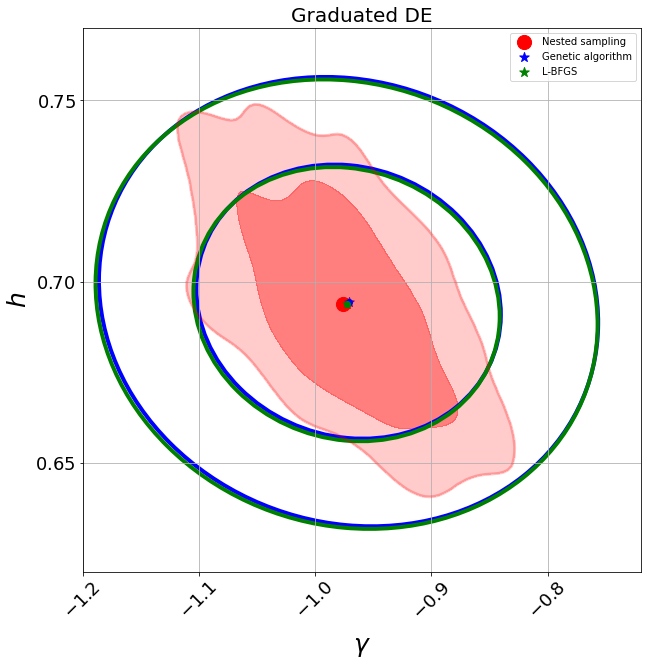

<Figure size 720x576 with 0 Axes>

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2951, 0.0220, 0.6945, -0.9713, -0.0103], cov_graduated_gadeap, par1=3, par2=2, par1_Ltx='$\gamma$', par2_Ltx='h', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2944, 0.0220,  0.6938, -0.9730, -0.0065], cov_graduated_maxlike, par1=3, par2=2, par1_Ltx='$\gamma$', par2_Ltx='h', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(-0.9763, 0.6938, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(-0.9713, 0.6945, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(-0.9730, 0.6938, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_graduated_nested, 'ggama', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_ylim(0.62, 0.77)
ax.set_xlim(-1.2, -0.72)
ax.set_title('Graduated DE', fontsize=20)
fig.savefig('graduated3_genetic.png')

In [11]:
data = np.loadtxt(dir_name+"Grad_Ok_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt", delimiter=' ')
data

array([[ 0.00000000e+000,  1.51652726e+003,  7.24338000e-002, ...,
        -7.35102914e+000, -5.52690182e+000, -2.41965974e-001],
       [ 0.00000000e+000,  1.48973388e+003,  8.03239300e-002, ...,
        -6.88846070e+001, -4.82756446e+002, -7.49123386e+000],
       [ 0.00000000e+000,  1.29996703e+003,  6.66341200e-002, ...,
        -6.49650045e+001, -4.21097785e+002, -2.82941889e+000],
       ...,
       [ 1.21393876e-236,  5.24578455e+002,  2.94022850e-001, ...,
        -7.39519819e+000, -4.66500348e+000, -6.04783487e-003],
       [ 1.22372586e-236,  5.24567664e+002,  2.94795730e-001, ...,
        -7.40248735e+000, -4.67401648e+000, -9.39994072e-006],
       [ 1.23206114e-236,  5.24564851e+002,  2.94117290e-001, ...,
        -7.38480581e+000, -4.64486729e+000, -1.34793046e-003]])

Text(0, 0.5, 'h')

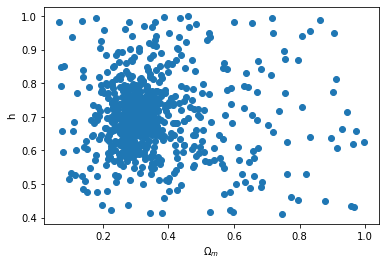

In [12]:
plt.scatter(data[:,2], data[:,4])
plt.xlabel('$\Omega_m$')
plt.ylabel('h')

Text(0, 0.5, '$\\psi$')

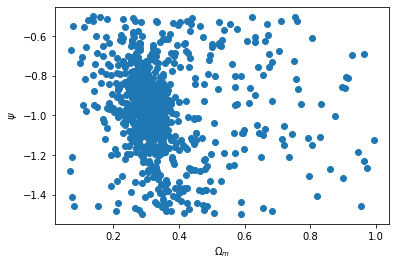

In [13]:
plt.scatter(data[:,2], data[:,5])
plt.xlabel('$\Omega_m$')
plt.ylabel('$\psi$')

Text(0, 0.5, '$\\psi$')

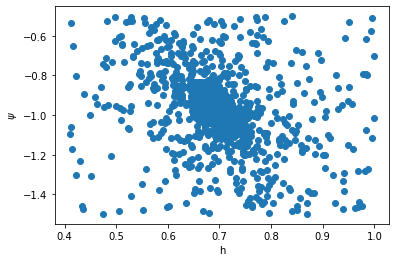

In [14]:
plt.scatter(data[:,4], data[:,5])
plt.xlabel('h')
plt.ylabel('$\psi$')

## Graduated using only BBAO

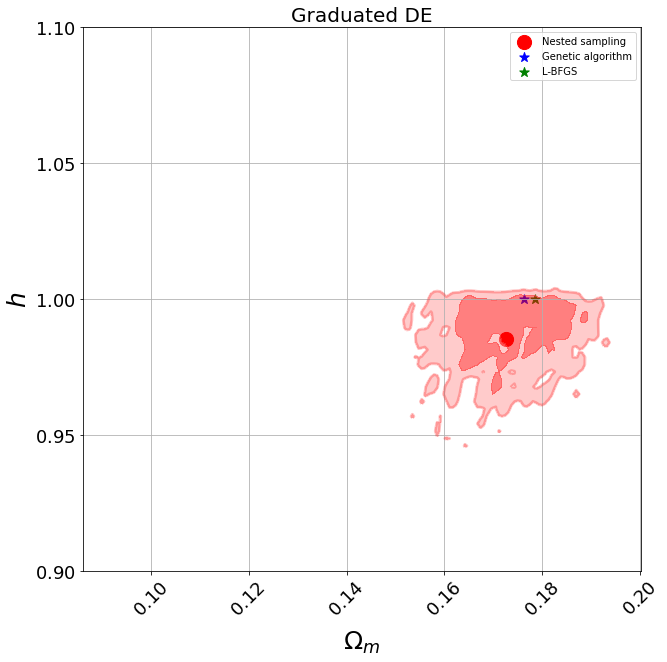

<Figure size 720x576 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# plot_elipses([1.0000, 0.0220, 0.7759, -1.4949, 0.0200], cov_graduatedBAO_gadeap, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
#              ax=ax, contour_col='b', axis_sty='-b')
# plot_elipses([0.1785,  0.0218,  1.0000, -0.5000, -0.0200], cov_graduatedBAO_maxlike, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
#              ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.1727, 0.9853, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.1762, 1.0000 , marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.1785, 1.0000, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.1,
                                             'smooth_scale_1D': 0.1, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_graduatedBAO_nested, 'Om', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_ylim(0.9, 1.1)
# ax.set_xlim(0.1, 1.1)
ax.set_title('Graduated DE', fontsize=20)
fig.savefig('graduatedBAO_genetic.png')

In [22]:
data = np.loadtxt(dir_name+"Grad_Ok_phy_BBAO_nested_multi_1.txt", delimiter=' ')
data

array([[ 0.00000000e+00,  3.04510847e+04,  3.34081190e-01, ...,
        -2.00000000e+00, -4.50000000e+00, -2.41965974e-01],
       [ 0.00000000e+00,  2.77764385e+04,  3.47698700e-01, ...,
        -2.00000000e+00, -4.50000000e+00, -1.75844086e+00],
       [ 0.00000000e+00,  2.72732084e+04,  3.54736210e-01, ...,
        -2.00000000e+00, -4.50000000e+00, -1.45515785e+00],
       ...,
       [ 6.74997728e-80,  1.63432928e+02,  1.84353220e-01, ...,
        -1.13688061e+00, -3.87268227e+00, -1.72363812e-01],
       [ 6.76958868e-80,  1.63427824e+02,  1.83842440e-01, ...,
        -1.32977823e+00, -4.08389777e+00, -2.58065528e-01],
       [ 6.88191346e-80,  1.63400199e+02,  1.87216980e-01, ...,
        -1.23781778e+00, -3.98043017e+00, -1.11151004e-01]])

Text(0, 0.5, 'h')

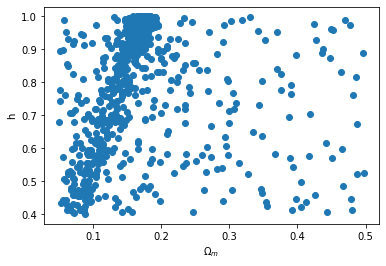

In [23]:
plt.scatter(data[:,2], data[:,4])
plt.xlabel('$\Omega_m$')
plt.ylabel('h')

Text(0, 0.5, '$\\psi$')

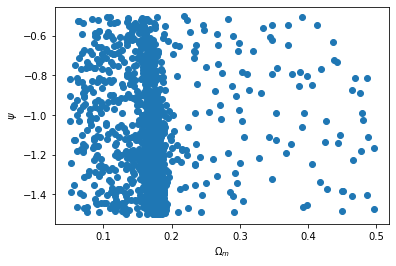

In [24]:
plt.scatter(data[:,2], data[:,5])
plt.xlabel('$\Omega_m$')
plt.ylabel('$\psi$')

Text(0, 0.5, '$\\psi$')

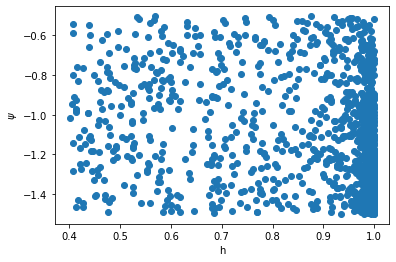

In [25]:
plt.scatter(data[:,4], data[:,5])
plt.xlabel('h')
plt.ylabel('$\psi$')